<a href="https://colab.research.google.com/github/rellethy/CS361/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 4

In [7]:

from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



cig_df = pd.read_csv('cigcancer-1.csv')
cig_df.head()

df_clean = cig_df['STATE\tCIG\tBLAD\tLUNG\tKID\tLEUK'].str.split('\t', expand=True)

df_clean.columns = ['STATE', 'CIG', 'BLAD', 'LUNG', 'KID', 'LEUK']


df_clean['CIG'] = pd.to_numeric(df_clean['CIG'], errors='coerce')
df_clean['BLAD'] = pd.to_numeric(df_clean['BLAD'], errors='coerce')
df_clean['LUNG'] = pd.to_numeric(df_clean['LUNG'], errors='coerce')
df_clean['KID'] = pd.to_numeric(df_clean['KID'], errors='coerce')
df_clean['LEUK'] = pd.to_numeric(df_clean['LEUK'], errors='coerce')

df_clean.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,STATE,CIG,BLAD,LUNG,KID,LEUK
0,AL,18.20,2.90,17.05,1.59,6.15
1,AZ,25.82,3.52,19.80,2.75,6.61
2,AR,18.24,2.99,15.98,2.02,6.94
3,CA,28.60,4.46,22.07,2.66,7.06
4,CT,31.10,5.11,22.83,3.35,7.20


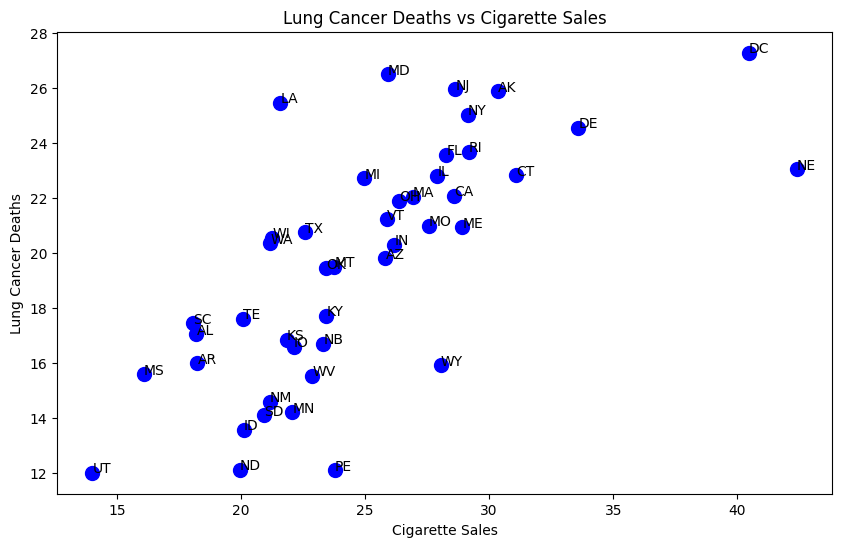

In [9]:

plt.figure(figsize=(10, 6))
plt.scatter(df_clean['CIG'], df_clean['LUNG'], marker='o', s=100, c='blue')
for i, row in df_clean.iterrows():
    plt.annotate(row['STATE'], (row['CIG'], row['LUNG']))
plt.xlabel('Cigarette Sales')
plt.ylabel('Lung Cancer Deaths')
plt.title('Lung Cancer Deaths vs Cigarette Sales')
plt.show()


In [21]:

# Correlation with outliers
correlation_with_outliers = df_clean['CIG'].corr(df_clean['LUNG'])
print(f"Correlation with outliers: {correlation_with_outliers}")

outlier_threshold = 2.5
z_scores_lung = (df_clean['LUNG'] - df_clean['LUNG'].mean()) / df_clean['LUNG'].std()
outliers = df_clean[abs(z_scores_lung) > outlier_threshold]

# Remove outliers
df_clean_no_outliers = df_clean[~df_clean.isin(outliers)].dropna()

correlation_without_outliers = df_clean_no_outliers['CIG'].corr(df_clean_no_outliers['LUNG'])
print(f"Correlation without outliers: {correlation_without_outliers}")


Correlation with outliers: 0.6974025049275292
Correlation without outliers: 0.6974025049275292


Outliers can influence the correlation coefficent making it appear stronger or weaker than it actually is, in this case, the correlation coefficient looks to be the same. So our outliars haven't effected the relationship

In [14]:

correlation_with_outliers_blad = df_clean['CIG'].corr(df_clean['BLAD'])
print(f"Correlation coefficient with outliers (bladder cancer): {correlation_with_outliers_blad}")

outlier_threshold = 2.5
z_scores_blad = (df_clean['BLAD'] - df_clean['BLAD'].mean()) / df_clean['BLAD'].std()
outliers_blad = df_clean[abs(z_scores_blad) > outlier_threshold]

df_clean_no_outliers_blad = df_clean[~df_clean.isin(outliers_blad)].dropna()

correlation_without_outliers_blad = df_clean_no_outliers_blad['CIG'].corr(df_clean_no_outliers_blad['BLAD'])
print(f"Correlation coefficient without outliers (bladder cancer): {correlation_without_outliers_blad}")


Correlation coefficient with outliers (bladder cancer): 0.7036218594614418
Correlation coefficient without outliers (bladder cancer): 0.6399803837444786


The correlation coefficent decreased when we removed outliars, so we can assume outliars were pushing the overall coreelation up. This could be because outliars add extreme values that can change the relationship between variables statistically.




In [15]:

correlation_with_outliers_kid = df_clean['CIG'].corr(df_clean['KID'])
print(f"Correlation coefficient with outliers (kidney cancer): {correlation_with_outliers_kid}")

outlier_threshold = 2.5
z_scores_kid = (df_clean['KID'] - df_clean['KID'].mean()) / df_clean['KID'].std()
outliers_kid = df_clean[abs(z_scores_kid) > outlier_threshold]

df_clean_no_outliers_kid = df_clean[~df_clean.isin(outliers_kid)].dropna()

correlation_without_outliers_kid = df_clean_no_outliers_kid['CIG'].corr(df_clean_no_outliers_kid['KID'])
print(f"Correlation coefficient without outliers (kidney cancer): {correlation_without_outliers_kid}")



Correlation coefficient with outliers (kidney cancer): 0.48738961703356476
Correlation coefficient without outliers (kidney cancer): 0.475819690163576


The correlation coefficent decreased when we removed outliars, so we can assume outliars were pushing the overall coreelation up. This result is miniscule, so we can assume that these outliars don't have that much of an impact on the relationship between cigarettes and kidney cancer.

In [16]:

correlation_with_outliers_leuk = df_clean['CIG'].corr(df_clean['LEUK'])
print(f"Correlation coefficient with outliers (leukemia): {correlation_with_outliers_leuk}")

outlier_threshold = 2.5
z_scores_leuk = (df_clean['LEUK'] - df_clean['LEUK'].mean()) / df_clean['LEUK'].std()
outliers_leuk = df_clean[abs(z_scores_leuk) > outlier_threshold]

df_clean_no_outliers_leuk = df_clean[~df_clean.isin(outliers_leuk)].dropna()

correlation_without_outliers_leuk = df_clean_no_outliers_leuk['CIG'].corr(df_clean_no_outliers_leuk['LEUK'])
print(f"Correlation coefficient without outliers (leukemia): {correlation_without_outliers_leuk}")


Correlation coefficient with outliers (leukemia): -0.06848122947663897
Correlation coefficient without outliers (leukemia): 0.001789795063305599


Looking at this case, we see that the correlation decerased from a stronger, negative relationship, to an almost 0 relationship. Looking at outliars, we can see that they can add values that have nothing to do with the rest of the dataset, distorting the relationship between variables.

(f) No, a positive correlation between cigarette sales and lung cancer scales does not mean that smoking causes lung cancer. There could be other confoudning factors that contribute to both high cigarette and lung cancer rates. We would need to conduct further research, to really uncover the relationships to a higher degree. Its important to remember that just because we see a correlation, we cannot say that x causes y.

(g) no, a negative correlation between cigarette sales and leukemia deaths does not mean that smoking cures lukemia. Going back to the previous question, correlation does not imply causation, and further research would need to be conducted to understand the relationship.

# Question 5


In [7]:

!pip install yahoo_fin

from yahoo_fin.stock_info import get_data
import pandas as pd
from datetime import datetime, timedelta

# Get the current date
today = datetime.today()

three_months_ago = today - timedelta(days=90)

# Coca-Cola
coca_cola_data = get_data("KO", start_date=three_months_ago.strftime("2024-06-13"), end_date=today.strftime("2024-09-13"))
coca_cola_df = coca_cola_data[['adjclose']]

# PepsiCo
pepsico_data = get_data("PEP", start_date=three_months_ago.strftime("2024-06-13"), end_date=today.strftime("2024-09-13"))
pepsico_df = pepsico_data[['adjclose']]


In [3]:

correlation = coca_cola_df['adjclose'].corr(pepsico_df['adjclose'])

print(f"Correlation coefficient between Coca-Cola and PepsiCo stock prices: {correlation}")


Correlation coefficient between Coca-Cola and PepsiCo stock prices: 0.9199471916295655


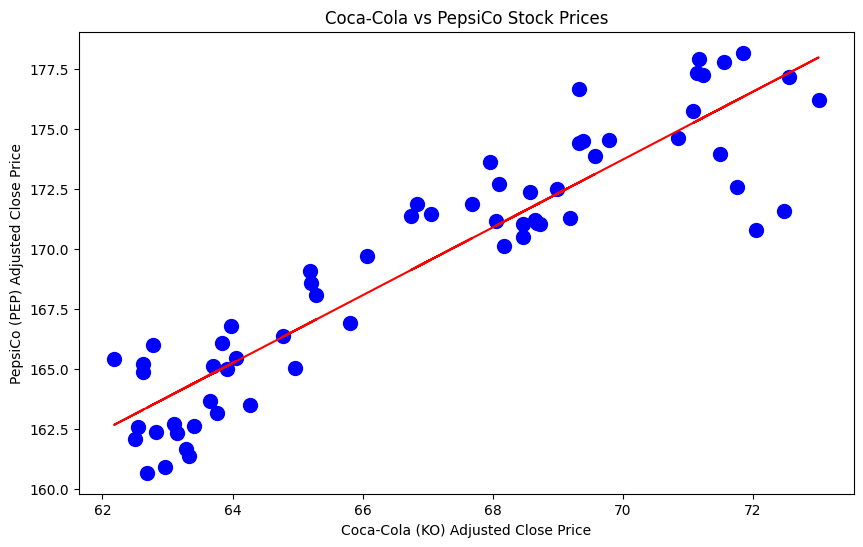

In [6]:

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(coca_cola_df['adjclose'], pepsico_df['adjclose'], marker='o', s=100, c='blue')
plt.xlabel('Coca-Cola (KO) Adjusted Close Price')
plt.ylabel('PepsiCo (PEP) Adjusted Close Price')
plt.title('Coca-Cola vs PepsiCo Stock Prices')

from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = coca_cola_df['adjclose'].values.reshape(-1, 1)
y = pepsico_df['adjclose'].values
model.fit(X, y)
predictions = model.predict(X)
plt.plot(coca_cola_df['adjclose'], predictions, color='red')

plt.show()
